# Coffee and Productivity

Does coffee consumption in a population correlate with higher productivity as measured in GDP per hour worked?

Background: On an individual level, consumption of coffee and its active ingredient, caffeine (a stimulant), is associated with higher levels of “energy” and “productivity”. But in a given population, such as a nation-state, does higher coffee consumption indicate a higher level of productivity? 


In [ ]:
%run master-dependencies.ipynb

# 1-1. World Coffee Consumption
Presented by Karen Mosley

In [2]:
%run karen-dependencies.ipynb

### Worldwide Mean 

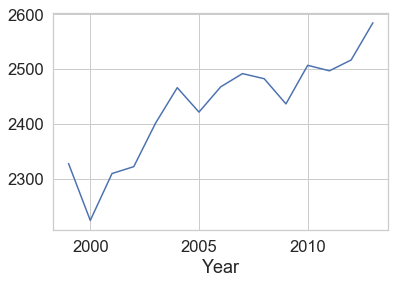

In [15]:
# Store the Coffee Consumption Data Grouped by Country and Year 
coffee_consumption_trend = coffee_data[["Country Name","Year","Coffee Consumed"]]

# Preview DataFrame
df_coffee_consumption = coffee_consumption_trend.pivot(index="Year", columns="Country Name",values="Coffee Consumed")

# Draw line of overall coffee consumption 
df_coffee_consumption.mean(axis=1).plot()

# Save the Figure
#plt.savefig('graph_coffee_consumption_trend.png', bbox_inches="tight")

### Coffee Consumption by Country

In [3]:
year = per_capita_coffee_data.iloc[:,1].unique()
coffee_consumption_by_ctry_per_capita = per_capita_coffee_data[["Country Name","Year","Coffee Consumed per Capita in Kg"]]
coffee_consumption_pivot_per_capita = coffee_consumption_by_ctry_per_capita.pivot(index="Year", columns="Country Name", values="Coffee Consumed per Capita in Kg")
avg_cofee_consumption_data = coffee_consumption_pivot_per_capita.mean(axis=1)

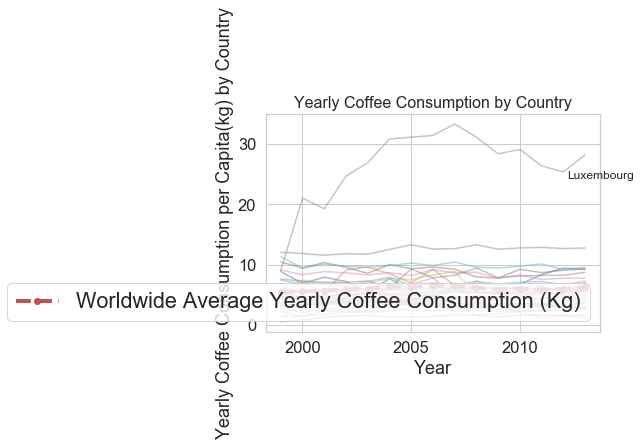

In [16]:
# Create line graph to illlustrate the combined mean coffee consumption by year graph with consumption graph by country

# Create figure with subplots
figure, ax = plt.subplots()

# Plot line for average worldwide consumption
ax.plot(year, avg_cofee_consumption_data, linewidth=4, marker="o", color = "r", linestyle = "--", label = "Worldwide Average Yearly Coffee Consumption (Kg)")

# Plot individual country lines
ax.plot(coffee_consumption_pivot_per_capita, alpha = .5)

# Add legend for avg worldwide consumption
legend1 = ax.legend(loc='lower right', fontsize='large')

# Add text to highlight outlier country
ax.text(.9, .74, "Luxembourg", transform=ax.transAxes, fontsize=12,
        verticalalignment='top')

# Add title and x,y labels
plt.title("Yearly Coffee Consumption by Country",{"fontsize":16})
plt.ylabel("Yearly Coffee Consumption per Capita(kg) by Country")
plt.xlabel("Year")

# Print and save graph
plt.show()
#plt.savefig(coffee_consumption_per_capita)

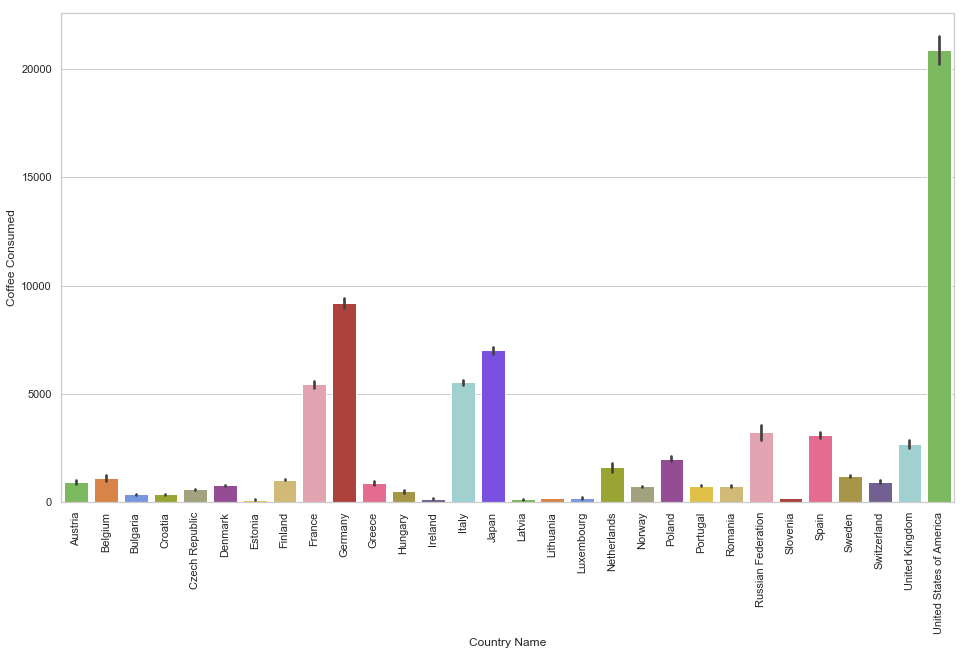

In [18]:
%run jin-dependencies.ipynb

[Text(0,0,'Austria'),
 Text(0,0,'Belgium'),
 Text(0,0,'Bulgaria'),
 Text(0,0,'Croatia'),
 Text(0,0,'Czech Republic'),
 Text(0,0,'Denmark'),
 Text(0,0,'Estonia'),
 Text(0,0,'Finland'),
 Text(0,0,'France'),
 Text(0,0,'Germany'),
 Text(0,0,'Greece'),
 Text(0,0,'Hungary'),
 Text(0,0,'Ireland'),
 Text(0,0,'Italy'),
 Text(0,0,'Japan'),
 Text(0,0,'Latvia'),
 Text(0,0,'Lithuania'),
 Text(0,0,'Luxembourg'),
 Text(0,0,'Netherlands'),
 Text(0,0,'Norway'),
 Text(0,0,'Poland'),
 Text(0,0,'Portugal'),
 Text(0,0,'Romania'),
 Text(0,0,'Russian Federation'),
 Text(0,0,'Slovenia'),
 Text(0,0,'Spain'),
 Text(0,0,'Sweden'),
 Text(0,0,'Switzerland'),
 Text(0,0,'United Kingdom'),
 Text(0,0,'United States of America')]

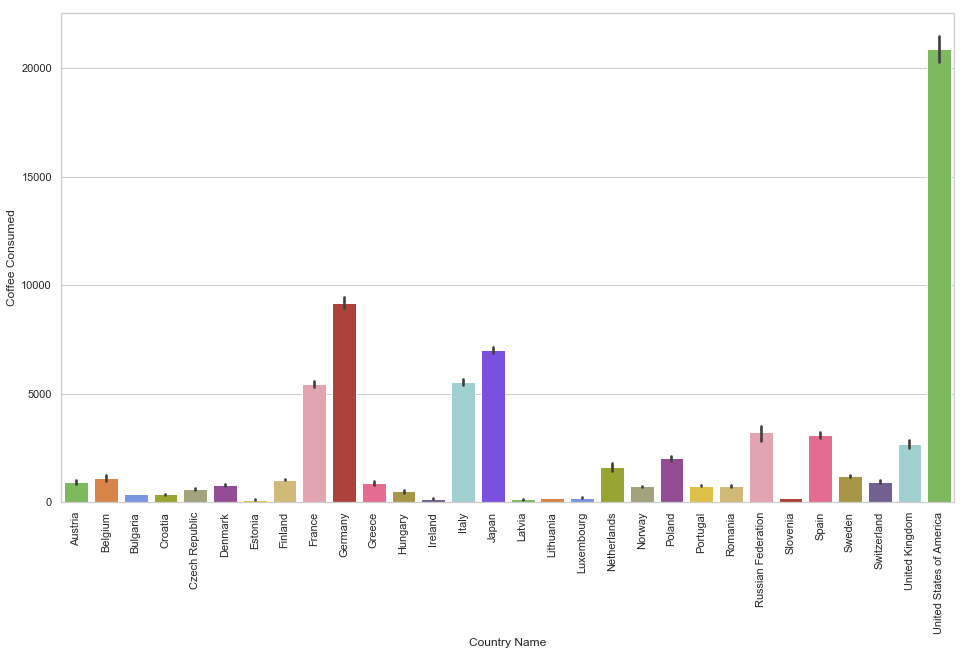

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

coffee_data = pd.read_csv(coffee_data_to_load)

coffee_by_country = sns.barplot(x="Country Name", y="Coffee Consumed", data = coffee_data, palette = country_type_colors)
coffee_by_country.set_xticklabels(coffee_by_country.get_xticklabels(), rotation = 90)


## Productivity
Presented by Jin Kim

### Mean GDP Per Hour Worked

Text(0.5,0,'Year')

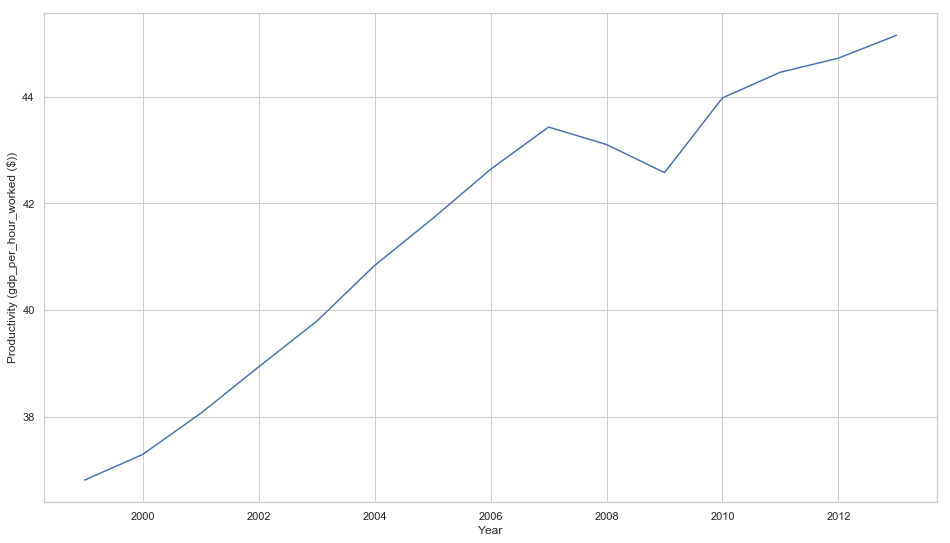

In [20]:
# Store the Productivity(GDP per hour worked) Data Grouped by Country and Year 
productivity_trend = coffee_data[["Country Name","Year","gdp_per_hour_worked ($)"]]

# Preview DataFrame
df_productivity_trend =productivity_trend.pivot(index="Year", columns="Country Name", values="gdp_per_hour_worked ($)")

# Generate the Plot (with Error Bars)
graph_productivity_trend = df_productivity_trend.mean(axis=1).plot()

#style
graph_productivity_trend.set_ylabel("Productivity (gdp_per_hour_worked ($))")
graph_productivity_trend.set_xlabel("Year")

# Draw line of overall coffee consumption 
# df_productivity_trend.mean(axis=1).plot()

# Save the Figure
#plt.savefig('graph_productivity_trend.png', bbox_inches="tight")

### Productivity Trend by Country

Text(0.5,0,'Year')

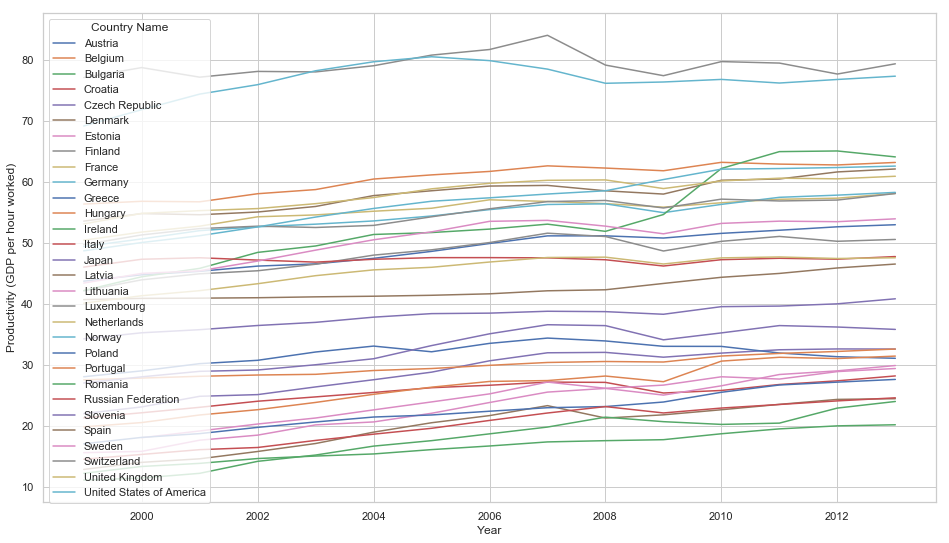

In [21]:
graph_productivity_by_country = df_productivity_trend.plot()

#style
graph_productivity_by_country.set_ylabel("Productivity (GDP per hour worked)")
graph_productivity_by_country.set_xlabel("Year")

# Draw line of coffee consumption by country
# df_productivity_trend.plot()

# Save the Figure
#plt.savefig('graph_productivity_by_country.png', bbox_inches="tight")

# Show the Figure
#plt.show()

### Mean Coffee Consumption and Mean of Productivity by Year

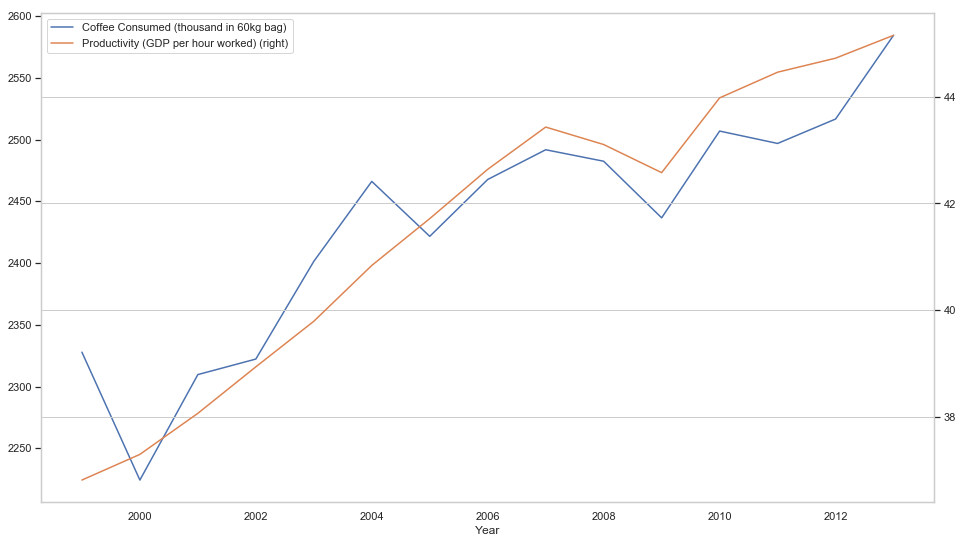

In [22]:
# Store the Coffee Consumption Data Grouped by Country and Year 
coffee_consumption_trend = coffee_data[["Country Name","Year","Coffee Consumed"]]

# Preview DataFrame
df_coffee_consumption = coffee_consumption_trend.pivot(index="Year", columns="Country Name",values="Coffee Consumed")

# Draw line of overall coffee consumption and productivity (multiple axis with different scales)

df_coffee_consumption.mean(axis=1).plot(label="Coffee Consumed (thousand in 60kg bag)", legend=True)
df_productivity_trend.mean(axis=1).plot(secondary_y=True, label="Productivity (GDP per hour worked)", legend=True)

# Save the Figure
#plt.savefig('graph_coffee_productivity_trend.png', bbox_inches="tight")

## Coffee Consumption and GDP - Rankings
Presented by Srini Mudivarthy

In [23]:
%run srini-dependencies.ipynb

### Top Countries by Coffee Consumption

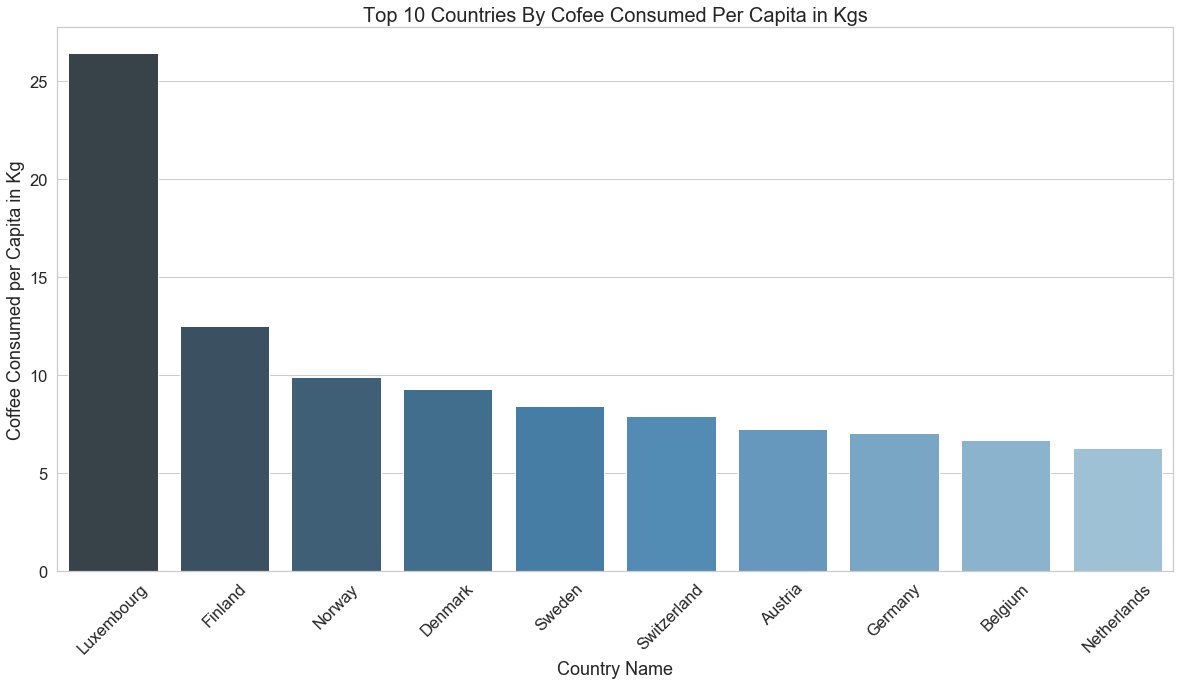

In [24]:
# Top 10 Coffee drinking per capita
top_coffee_pc = mean_values_country_df.sort_values("Coffee Consumed per Capita in Kg", ascending = False)\
.head(10).reset_index()
#top_coffee_pc
plt.figure(figsize=(20,10))
sns.set(font_scale = 1.5, style="whitegrid")
g=sns.barplot(x='Country Name',y='Coffee Consumed per Capita in Kg',data=top_coffee_pc, palette="Blues_d")
# Labels for the Graph
plt.xticks(rotation=45)
plt.title('Top 10 Countries By Cofee Consumed Per Capita in Kgs', size =20)
plt.savefig("Top_10_Coffee.png")
plt.show()

### Top Countries by GDP¶
Which Countries Show Higher Productivity Compare to Other Countries?

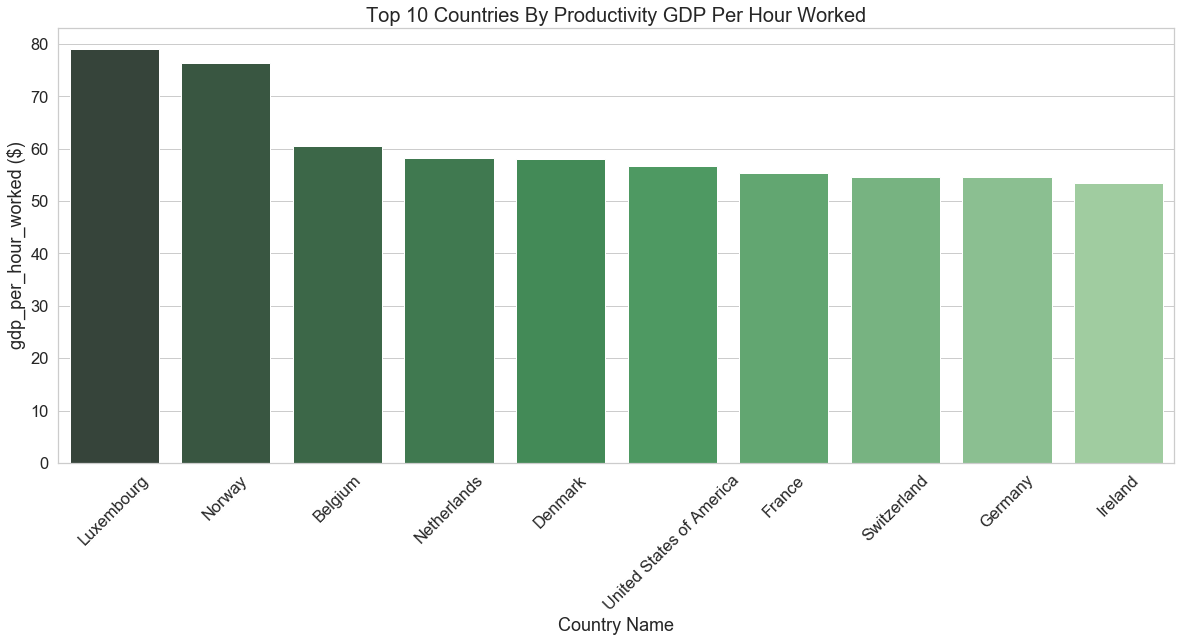

In [14]:
# Top 10 productivity countries per capita
top_productivity_pc = mean_values_country_df.sort_values("gdp_per_hour_worked ($)", ascending = False)\
.head(10).reset_index()
#top 10 Coffee drinking per person graph
plt.figure(figsize=(20,8))
sns.set(font_scale = 1.5, style="whitegrid")
g=sns.barplot(x='Country Name',y='gdp_per_hour_worked ($)',data=top_productivity_pc, palette="Greens_d")

# Labels for the Graph
plt.xticks(rotation=45)
plt.title('Top 10 Countries By Productivity GDP Per Hour Worked', size =20)
plt.savefig("Top_10_Productive.png")
plt.show()

## Correlation between Coffee Consumption and GDP Per Hour Worked
Presented by Michael Coats

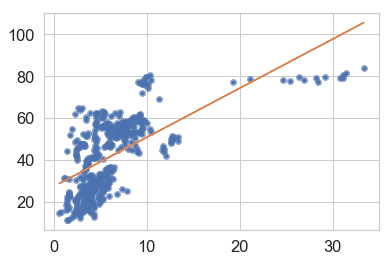

In [25]:
# define x-axis and y-axis
x = coffee_data["Coffee Consumed"]*1000*60/coffee_data["population"]
y = coffee_data["gdp_per_hour_worked ($)"]

plt.scatter(x, y, alpha=0.5)

import numpy as np
from numpy.polynomial.polynomial import polyfit
import matplotlib.pyplot as plt

# Fit with polyfit
b, m = polyfit(x, y, 1)

plt.plot(x, y, '.')
plt.plot(x, b + m * x, '-')
plt.show()

# Save the Figure
#plt.savefig('graph_corr_coffee_productivity.png', bbox_inches="tight")

# https://stackoverflow.com/questions/19068862/how-to-overplot-a-line-on-a-scatter-plot-in-python

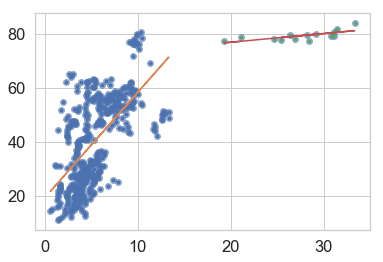

In [26]:
# define x-axis and y-axis
x_smaller = x.iloc[x.values < 15]
y_smaller = y.loc[x_smaller.index.tolist()]

x_larger = x.iloc[x.values >= 15]
y_larger = y.iloc[x_larger.index.tolist()]

plt.scatter(x, y, alpha=0.5)

# Fit with polyfit
b_smaller, m_smaller = polyfit(x_smaller, y_smaller, 1)
b_larger, m_larger = polyfit(x_larger, y_larger, 1)

plt.plot(x_smaller, y_smaller, '.')
plt.plot(x_smaller, b_smaller + m_smaller * x_smaller, '-')

plt.plot(x_larger, y_larger, '.')
plt.plot(x_larger, b_larger + m_larger * x_larger, '-')

plt.show()

# Save the Figure
#plt.savefig('graph_corr_coffee_productivity_two.png', bbox_inches="tight")

## Correlation Between Coffee Consumption and Productivity
Hypothesis Test: Is P-Value < 0.05 and Can We Reject Null-Hypothesis?

Presented by: Andrew

In [30]:
%run andrew-dependencies.ipynb

In [35]:
x_axis = df['Coffee Consumed']
y_axis = df['gdp_per_hour_worked ($)']
# Correlation
x_axis.corr(y_axis)

0.22850836443541234

In [41]:
# T-Test
from scipy.stats import ttest_ind
(t, p) = ttest_ind(x_axis, y_axis)
if p < 0.005:
    print("P-value = " + str(p))
    print("P-value is tiny.")
    print("P-value is truth.")
    print("P-value is life.")
else:
    print("Sucks for you, statistician.")

P-value = 1.4250762955793698e-32
P-value is tiny.
P-value is truth.
P-value is life.


In [42]:
# Pearson 
from scipy.stats import pearsonr
pearsonr(x.values, y.values)

(0.6333937134504156, 9.952421066806015e-52)

In [44]:
# Spearman 
from scipy.stats import spearmanr
spearmanr(x.values, y.values)

SpearmanrResult(correlation=0.6651688938381588, pvalue=1.1140237618904332e-58)

### P-Values for <15k coffee consumption

In [46]:
# Pearson for smaller values 
from scipy.stats import pearsonr
pearsonr(x_smaller.values, y_smaller.values)


SpearmanrResult(correlation=0.6319734902768038, pvalue=7.022143773167701e-50)

In [ ]:
# Spearman 
from scipy.stats import spearmanr
spearmanr(x_smaller.values, y_smaller.values)

### P-Values for >15k coffee consumption

In [ ]:
from scipy.stats import pearsonr
pearsonr(x_larger.values, y_larger.values)

In [ ]:
# what is p-value? 
from scipy.stats import spearmanr
spearmanr(x_larger.values, y_larger.values)

# Summary

There appears to be a strong correlation between coffee consumption and productivity of a population as measured in GDP (per hour worked and per capita).

Some other points to consider:
 - We only looked at coffee consumption and GDP data. There is a wealth of other data to explore. 
 - There are likely to be other correlations as well across the population, implying that coffee consumption and GDP are dependant on other factors not identified.
   